In [2]:
import pandas as pd
import matplotlib.pyplot as plt

base_df = pd.read_excel("VALO Yr 2023.xlsx")
data_df = pd.read_excel("VALO Yr 2023.xlsx")

# View the first few rows of the data
data_df.head()


,Sr No,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,...,rating,acs,kill,death,assist,kast%,adr,hs%,fk,fd
0,0,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,1.19,239,15,11,6,0.72,146,0.16,1,0
1,1,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.84,234,15,14,6,0.61,145,0.32,1,4
2,2,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.68,173,10,15,2,0.67,123,0.18,4,2
3,3,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.63,142,8,15,4,0.83,92,0.29,3,2
4,4,53658,119512,ZETA,5,DRX,13,opponent win,Ascent,opponent pick,...,0.57,114,7,16,8,0.61,63,0.13,0,1


In [3]:
# Drop the unnecessary column 'Sr No'
data_df.drop(columns=['Sr No'], inplace=True)

# Check for missing values
missing_values = data_df.isnull().sum()

# Print missing values
print("Missing Values:")
print(missing_values)


Missing Values:
match_id      0
game_id       0
team          0
score_team    0
opponent      0
score_opp     0
win_lose      0
map           0
map_pick      0
player_id     0
player        0
agent         0
rating        0
acs           0
kill          0
death         0
assist        0
kast%         0
adr           0
hs%           0
fk            0
fd            0
dtype: int64


In [4]:
# Convert 'agent' column to categorical data type
data_df['agent'] = data_df['agent'].astype('category')


In [5]:
# Compute summary statistics for numerical columns
num_summary_stats = data_df.describe()

# Print summary statistics
print("Summary Statistics for Numerical Columns:")
print(num_summary_stats)


Summary Statistics for Numerical Columns:
           match_id        game_id   score_team    score_opp     player_id  \
count   6230.000000    6230.000000  6230.000000  6230.000000   6230.000000   
mean   56190.330658  125572.073836    10.695827    10.695827   4843.833868   
std     3216.927760    7711.423206     3.438765     3.438765   5696.784432   
min    52768.000000  117161.000000     0.000000     0.000000      4.000000   
25%    53561.000000  119246.000000     8.000000     8.000000    733.000000   
50%    53699.000000  119636.000000    13.000000    13.000000   2764.000000   
75%    59969.000000  134549.000000    13.000000    13.000000   7718.000000   
max    61198.000000  137663.000000    21.000000    21.000000  39163.000000   

              kill        death       assist  
count  6230.000000  6230.000000  6230.000000  
mean     14.812520    14.819101     6.597592  
std       5.319357     3.668542     4.042918  
min       2.000000     2.000000     0.000000  
25%      11.000000  

In [6]:
# Convert 'rating' column to numeric datatype, handle non-numeric values as NaN
data_df['rating'] = pd.to_numeric(data_df['rating'], errors='coerce')

# Compute average rating grouped by map
map_performance = data_df.groupby('map')['rating'].mean()

# Print map performance
print("Map Performance on avg of every player:")
print(map_performance)


Map Performance on avg of every player:
map
Ascent      1.015126
Bind        1.005667
Fracture    1.007781
Haven       1.005287
Icebox      0.999095
Lotus       1.005909
Pearl       1.010593
Split       1.007411
Name: rating, dtype: float64


In [7]:
# Performance metrics for top players
player_rating_mean = data_df.groupby('player')['rating'].mean()
top_players = player_rating_mean.nlargest(10)
top_players_with_teams = pd.merge(top_players, data_df[['player', 'team']].drop_duplicates(), on='player', how='left')
print("Top 10 Players (by rating) with Teams:")
print(top_players_with_teams)


Top 10 Players (by rating) with Teams:
      player    rating  team
0    Alfajer  1.228298   FNC
1        Leo  1.219038   FNC
2      aspas  1.185593  LOUD
3       Sayf  1.179565    TL
4      kiNgg  1.175122   LEV
5      Bunny  1.170000   BNY
6  something  1.161000   PRX
7       Less  1.157458  LOUD
8  Chronicle  1.154038   FNC
9      AAAAY  1.147500   FPX


In [8]:
import plotly.graph_objects as go

# Create a radial graph for the top players
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=top_players_with_teams['rating'],
    theta=top_players_with_teams['player'],
    fill='toself',
    name='Player Ratings'
))

# Customize the layout
# trail and error 1 to 1.25
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[1, 1.25]
        )
    ),
    title="Performance Metrics of Top Players",
    template="plotly_dark"
)

# Show the plot
fig.show()


In [9]:
# Group data by player and agent, then count unique occurrences of agents
player_agent_counts = data_df.groupby('player')['agent'].nunique()

# Find the top 3 players based on ratings
top_players = player_rating_mean.nlargest(3).index

# Extract unique agents played by each top player
top_player_unique_agents = {}

# Extract unique agents played by each top player
for player in top_players:
    player_agents = data_df[data_df['player'] == player]['agent'].unique()
    top_player_unique_agents[player] = player_agents

# Create lists to store data for plotting
players = []
unique_agent_counts = []

# Iterate over top players and their unique agents
for player, unique_agents in top_player_unique_agents.items():
    players.append(player)
    agent_counts = [player_agent_counts[player] if agent in unique_agents else 0 for agent in unique_agents]
    unique_agent_counts.append(agent_counts)


In [10]:
# Calculate agent usage statistics
agent_usage = data_df['agent'].value_counts()

# Print agent usage statistics
print("Agent Usage:")
print(agent_usage)


Agent Usage:
killjoy      809
jett         780
skye         617
viper        583
omen         575
raze         517
sova         379
breach       361
kayo         316
astra        283
brimstone    201
harbor       199
cypher       154
fade         146
sage          81
neon          73
gekko         59
chamber       40
yoru          22
phoenix       21
reyna         14
Name: agent, dtype: int64


In [ ]:
# Calculate agent pick rate per game
agent_usage_per_game = data_df.groupby(['game_id', 'agent']).size()
total_games = len(data_df['game_id'].unique())
agent_pick_rate_per_game = agent_usage_per_game.groupby('agent').count() / total_games

# Print agent pick rate per game
print("Agent Pick Rate per Game:")
print(agent_pick_rate_per_game)


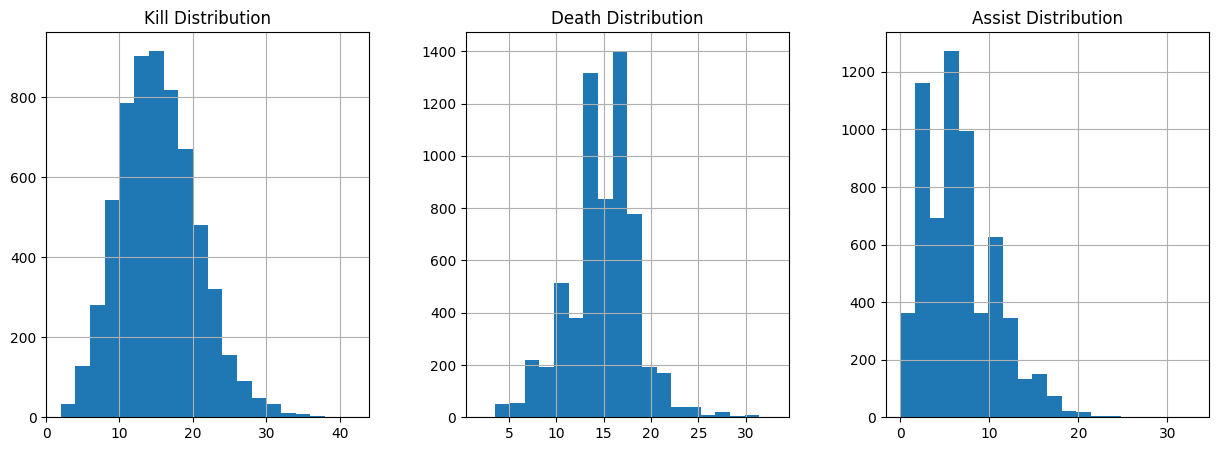

In [13]:
# Create subplots for kill/death/assist distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for kill, death, and assist columns
data_df[['kill', 'death', 'assist']].hist(ax=axes, bins=20)

# Set titles for each subplot
axes[0].set_title('Kill Distribution')
axes[1].set_title('Death Distribution')
axes[2].set_title('Assist Distribution')

# Show the plot
plt.show()

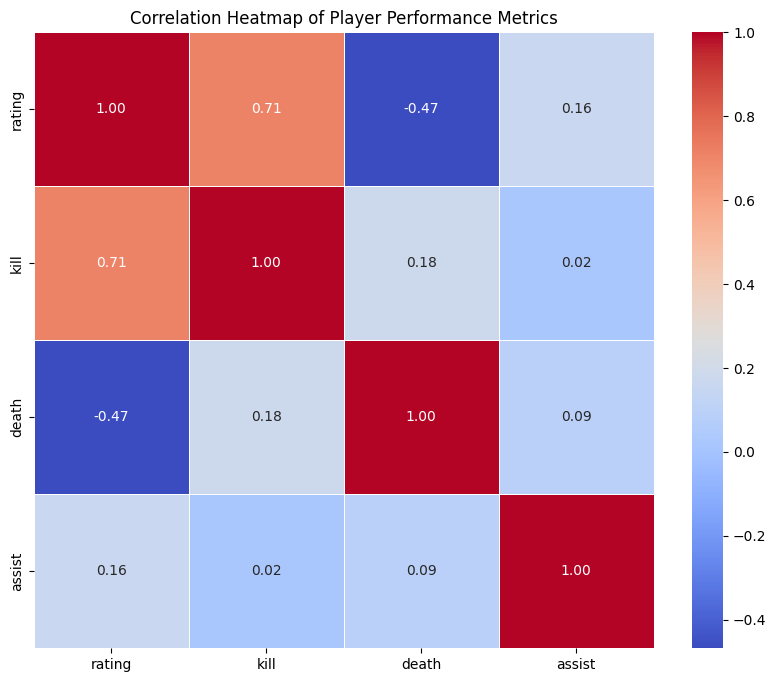

In [14]:
import seaborn as sns

# Compute the correlation matrix
corr = data_df[['rating', 'kill', 'death', 'assist']].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Player Performance Metrics')
plt.show()

In [15]:
import plotly.express as px

# Calculate total rating for each team
team_ratings = data_df.groupby('team')['rating'].sum().reset_index()

# Create a Tree Map graph for player rating distribution by team
fig = px.treemap(team_ratings, path=['team'], values='rating', title='Player Rating Distribution by Team')
fig.show()


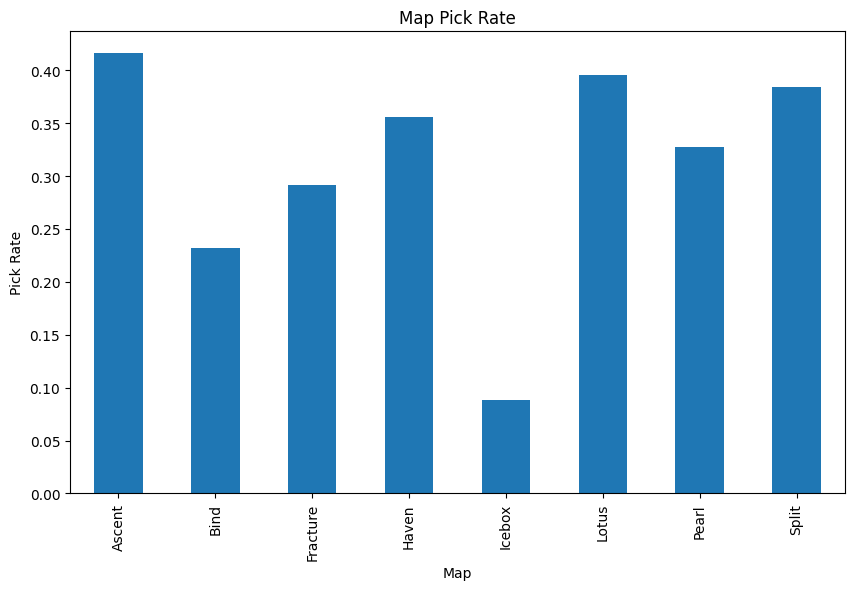

In [16]:
# Calculate map pick rate
map_pick_rate = data_df.groupby(['map', 'match_id']).size().groupby('map').count() / len(data_df['match_id'].unique())

# Plot the bar chart for map pick rate
map_pick_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Map Pick Rate')
plt.xlabel('Map')
plt.ylabel('Pick Rate')
plt.show()


In [17]:
import plotly.graph_objects as go

# Calculate average rating, best, and worst for each categ
# Giving Categ to Agents
categories = {
    'Controller': ['astra', 'brimstone', 'omen', 'viper', 'harbor'],
    'Duelist': ['jett', 'phoenix', 'raze', 'reyna', 'yoru', 'neon'],
    'Initiator': ['breach', 'kay/o', 'skye', 'sova', 'gekko', 'fade'],
    'Sentinel': ['cypher', 'killjoy', 'sage', 'chamber']
}
category_ratings = {}

# Calculate average rating, best, and worst for each category
for category, agents in categories.items():
    category_data = data_df[data_df['agent'].str.lower().isin(agents)]
    avg_rating = category_data['rating'].mean()
    best_rating = category_data['rating'].max()
    worst_rating = category_data['rating'].min()
    category_ratings[category] = {'Average': avg_rating, 'Best': best_rating, 'Worst': worst_rating}

# Create a line plot to visualize ratings for each category
fig = go.Figure()

# Add traces for each metric
for metric in ['Average', 'Best', 'Worst']:
    fig.add_trace(go.Scatter(
        x=list(category_ratings.keys()),
        y=[rating[metric] for rating in category_ratings.values()],
        mode='lines+markers',
        name=metric
    ))

# Customize the layout
fig.update_layout(
    title="Performance Metrics for Each Category",
    xaxis_title="Agent Category",
    yaxis_title="Rating",
    template="plotly_dark"
)

# Show the plot
fig.show()


In [18]:
# Calculate the average number of agents for every category in a game
category_counts_per_game = {category: [] for category in categories.keys()}
team_agents_per_game = []

for game_id, game_data in data_df.groupby('game_id'):
    category_counts = {category: 0 for category in categories.keys()}
    team_agents = {'Controller': '', 'Duelist': '', 'Initiator': '', 'Sentinel': ''}
# For loop to Nested if
    for agent in game_data['agent']:
        for category, agents in categories.items():
            if agent.lower() in agents:
                category_counts[category] += 1
                if not team_agents[category]:
                    team_agents[category] = agent

    team_agents_per_game.append(team_agents)

    for category, count in category_counts.items():
        category_counts_per_game[category].append(count / 2)  # Divide by 2 for one team

# Calculate the average number of agents for each category
average_category_counts = {category: sum(counts) / len(counts) for category, counts in category_counts_per_game.items()}

# Print the average number of agents for every category
for category, avg_count in average_category_counts.items():
    print(f"Average number of agents for {category} category: {avg_count}")


Average number of agents for Controller category: 1.4775280898876404
Average number of agents for Duelist category: 1.1452648475120386
Average number of agents for Initiator category: 1.2536115569823434
Average number of agents for Sentinel category: 0.869983948635634


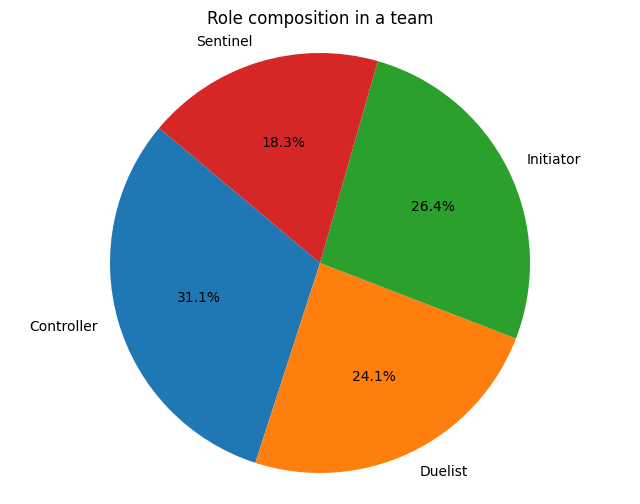

In [19]:
# Data preparation
categories = list(average_category_counts.keys())
avg_counts = list(average_category_counts.values())

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(avg_counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Role composition in a team')
plt.axis('equal')
plt.show()


In [20]:

# Define categ with corresponding agent lists
# Have to assign multiple times or just Nest if to connect
# sometime works, sometime doesnt
categories = {
    'Controller': ['astra', 'brimstone', 'omen', 'viper', 'harbor'],
    'Duelist': ['jett', 'phoenix', 'raze', 'reyna', 'yoru', 'neon'],
    'Initiator': ['breach', 'kay/o', 'skye', 'sova', 'gekko', 'fade'],
    'Sentinel': ['cypher', 'killjoy', 'sage', 'chamber']
}

# Calculate the average number of agents for every category in a game
category_counts_per_game = {category: [] for category in categories.keys()}
team_agents_per_game = []

# Iterate over each game and compute category counts
for game_id, game_data in data_df.groupby('game_id'):
    category_counts = {category: 0 for category in categories.keys()}
    team_agents = {'Controller': '', 'Duelist': '', 'Initiator': '', 'Sentinel': ''}

    # Count agents in each category for the current game
    for agent in game_data['agent']:
        for category, agents in categories.items():
            if agent.lower() in agents:
                category_counts[category] += 1
                if not team_agents[category]:
                    team_agents[category] = agent

    # Store team composition for the game
    team_agents_per_game.append(team_agents)

    # Append category counts for the current game
    for category, count in category_counts.items():
        category_counts_per_game[category].append(count / 2)  # Divide by 2 for one team

# average number of agents for each category
average_category_counts = {category: sum(counts) / len(counts) for category, counts in category_counts_per_game.items()}

# Create a line plot to visualize the average number of agents for each category
fig = go.Figure()

# Add traces for each category
for category, avg_count in average_category_counts.items():
    fig.add_trace(go.Scatter(
        x=list(range(len(category_counts_per_game[category]))),
        y=category_counts_per_game[category],
        mode='lines+markers',
        name=category
    ))

# Customize the layout
fig.update_layout(
    title="Change in Average Number of Agents for Each Category Over Games",
    xaxis_title="Game ID",
    yaxis_title="Average Number of Agents",
    template="plotly_dark"
)

# Show the plot
fig.show()


In [21]:
# Calculate the average number of agents for every category in a game (1 team)
category_counts_per_game = {category: [] for category in ['Controller', 'Duelist', 'Initiator', 'Sentinel']}
team_agents_per_game = []
team_agents_avg_rating = {agent: [] for agent in ['astra', 'jett', 'breach', 'cypher', 'viper']}  # Initialize

# # As I told before Hvae to use Nested if now
# Iterate over each game
for game_id, game_data in data_df.groupby('game_id'):
    # Initialize counts for each category
    category_counts = {category: 0 for category in ['Controller', 'Duelist', 'Initiator', 'Sentinel']}
    team_agents = {'Controller': '', 'Duelist': '', 'Initiator': '', 'Sentinel': ''}
    # Iterate over each agent in the game
    for agent in game_data['agent']:
        # Assign the agent to a category
        if agent.lower() in ['astra', 'brimstone', 'omen', 'viper', 'harbor']:
            category_counts['Controller'] += 1
            if not team_agents['Controller']:
                team_agents['Controller'] = agent
        elif agent.lower() in ['jett', 'phoenix', 'raze', 'reyna', 'yoru', 'neon']:
            category_counts['Duelist'] += 1
            if not team_agents['Duelist']:
                team_agents['Duelist'] = agent
        elif agent.lower() in ['breach', 'kay/o', 'skye', 'sova', 'gekko', 'fade']:
            category_counts['Initiator'] += 1
            if not team_agents['Initiator']:
                team_agents['Initiator'] = agent
        elif agent.lower() in ['cypher', 'killjoy', 'sage', 'chamber']:
            category_counts['Sentinel'] += 1
            if not team_agents['Sentinel']:
                team_agents['Sentinel'] = agent

    team_agents_per_game.append(team_agents)

    # Append the category counts for one team in the game to the dictionary
    for category, count in category_counts.items():
        category_counts_per_game[category].append(count / 2)  # Divide by 2 for one team

    # Calculate the average rating for each agent and store it
    for agent, category in {'astra': 'Controller', 'jett': 'Duelist', 'breach': 'Initiator', 'cypher': 'Sentinel', 'viper': 'Controller'}.items():
        avg_rating = sum(category_counts_per_game.get(category, [])) / len(category_counts_per_game.get(category, []))
        team_agents_avg_rating[agent].append(avg_rating)

# Choose the last agent based on highest average rating among the available categories
last_agent = max(team_agents_avg_rating, key=lambda x: team_agents_avg_rating[x][-1])

print(f"Default team composition based on 2023 performance on every map:")

# Print the agent names for each category in the team
for category, agent in team_agents_per_game[0].items():
    print(f"Agent for {category} category: {agent}")

print(f"Last agent chosen based on highest average rating among available categories: {last_agent}")


Default team composition based on 2023 performance on every map:
Agent for Controller category: viper
Agent for Duelist category: jett
Agent for Initiator category: sova
Agent for Sentinel category: sage
Last agent chosen based on highest average rating among available categories: astra


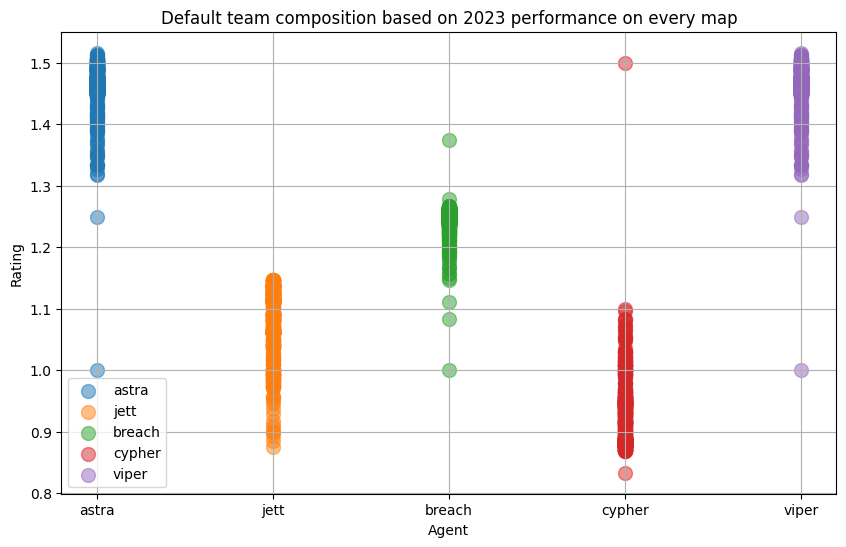

In [22]:
# Get unique agents
unique_agents = list(team_agents_avg_rating.keys())

# Create agent indices
agent_indices = {agent: index + 1 for index, agent in enumerate(unique_agents)}

# Plotting the bubble graph
plt.figure(figsize=(10, 6))

# Plotting the bubble for each agent
for agent, avg_ratings in team_agents_avg_rating.items():
    plt.scatter([agent_indices[agent]] * len(avg_ratings), avg_ratings, s=100, alpha=0.5, label=agent)

# Adding labels and title
plt.xlabel('Agent')
plt.ylabel('Rating')
plt.title('Default team composition based on 2023 performance on every map')
plt.xticks(list(agent_indices.values()), list(agent_indices.keys()))  # Set x-axis ticks to agent names
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import plotly.graph_objects as go

# Prompt user to enter the map name
available_maps = ['Ascent', 'Pearl', 'Haven', 'Lotus', 'Icebox', 'Fracture', 'Split', 'Bind']
selected_map = input(f"Enter the map name from available maps ({', '.join(available_maps)}): ")

# Check if the entered map is valid
if selected_map not in available_maps:
    print("Invalid map name entered.")
else:
    # Filter data for the selected map
    map_data = data_df[data_df['map'] == selected_map]

    # Calculate the average rating for each agent on the selected map
    agent_ratings = map_data.groupby('agent')['rating'].mean().reset_index()

    # Sort agents by rating
    agent_ratings = agent_ratings.sort_values(by='rating', ascending=False)

    # Initialize lists to store agents for each category
    controller_agents = []
    duelist_agents = []
    initiator_agents = []
    sentinel_agents = []

    # Nested If Iterate over each agent and assign them to their respective category
    # Realized first letter wasnt caps
    for agent in agent_ratings['agent']:
        if agent.lower() in ['astra', 'brimstone', 'omen', 'viper', 'harbor']:
            controller_agents.append(agent)
        elif agent.lower() in ['jett', 'phoenix', 'raze', 'reyna', 'yoru', 'neon']:
            duelist_agents.append(agent)
        elif agent.lower() in ['breach', 'kay/o', 'skye', 'sova', 'gekko', 'fade']:
            initiator_agents.append(agent)
        elif agent.lower() in ['cypher', 'killjoy', 'sage', 'chamber']:
            sentinel_agents.append(agent)

    # Create a list of agents in the ideal team composition
    ideal_team_agents = controller_agents[:1] + duelist_agents[:1] + initiator_agents[:1] + sentinel_agents[:1]

    # Choose the fifth agent based on the highest rating among the remaining agents
    remaining_agents = agent_ratings[~agent_ratings['agent'].isin(ideal_team_agents)]
    fifth_agent = remaining_agents.iloc[0]['agent']

    # Add the fifth agent to the ideal team composition
    ideal_team_agents.append(fifth_agent)

    # Filter agent ratings for agents in the ideal team composition
    ideal_team_ratings = agent_ratings[agent_ratings['agent'].isin(ideal_team_agents)]

    colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)']
    fig = go.Figure([go.Bar(x=ideal_team_ratings['agent'], y=ideal_team_ratings['rating'], marker_color=colors)])
    fig.update_layout(title=f"Ideal Team Composition on Based Ratings for {selected_map}",
                      xaxis_title="Agent",
                      yaxis_title="Average Rating",
                      template="plotly_dark")

    # Show the plot
    fig.show()
